---
---

# CLUSTERING BREAST CANCER WINSCOSIN DATASET
---
---

# Preliminaries
---

## Pitch Summary
<div class="alert alert-block alert-warning">
Present a short summary of the pitch!

(Up to 5 bullet points, this cell)
</div>

* The dataset contains characteristics of the cell nuclei present in the image of the suspicious breast mass.
* Identifying clusters can lead to better treatment or diagnosis, it can also help in further research.
* We could have done two things, one is identifying subcategories within tumours classified as Malignant or Benign.
* And two, identify different clusters based on the dataset's features and compare them to its original classification.
* Choosing the second objective as the goal for this exercise.

## Dataset Reference

<div class="alert alert-block alert-warning">
Present the origin of the dataset, including e.g.
    
* the source where you got it from (link to the repository),
* the author(s),
* the license,
* the purpose for which it was collected!

(Text/bullet points, this cell)
</div>

* source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
* Authors: William Wolberg, Olvi Mangasarian, Nick Street, W. Street
* license: <a href=https://creativecommons.org/licenses/by/4.0/legalcode>Creative Commons Attribution 4.0 International</a>
* purpose: It contains measurements derived from fine needle aspirates (FNA) of breast masses, which were digitized to extract features describing the characteristics of cell nuclei to create a highly accurate system for diagnosis of breast tumours.


## Dataset Suitability

<div class="alert alert-block alert-warning">
Explain why the dataset is suitable for the pitched task!
    
(Up to 3 bullet points, this cell)
</div>

* The dataset is not an artificial dataset, the recordings are of actual tumours.
* The dataset has continuous values for all the fields making it ideal for clustering.
* The dataset also includes a diagnosis column which can be used for comparing if our clustering result for the dataset has only two clusters or if there are more.



# Imports and Settings
---
<div class="alert alert-block alert-warning">
Use the following code cell to organize all imports and global settings.
Do not remove the pandas option.
    
(Commented code, in the next cell)
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pca import pca as pca_p
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
# make pandas display ALL columns of a dataframe
pd.options.display.max_columns = None

# The Data
---

## The Raw Data
<div class="alert alert-block alert-warning"> 
Load the data and present a couple of samples. Call the dataset variable "raw".

(Commented code, add cells)
</div>


In [2]:
# loading and presenting the dataset. manually adding the column names as the datafile doesn't have it by default. These column names are read from wdbc.names file
column_names=['id','diagnosis','mean_radius', 'mean_texture',
'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness',
'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
'radius_error', 'texture_error', 'perimeter_error', 'area_error',
'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error',
'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture',
'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness',
'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
raw = pd.read_csv('data/wdbc.data', names=column_names)

# printing the first five rows
raw.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div class="alert alert-block alert-warning"> 
Explain the dataset with all its features.
    
* The features should be described in the following table. The range is the set of possible values that a feature can take, e.g. "red, green, blue", "$\mathbb{R}$", "$1,2,...,12$".
* You may describe each feature individually or groups of features, if many features are similar (whatever is easier to explain.)

(Text/bullet points + table, this cell)
</div>


* The Breast Cancer Wiscosin Dataset has 32 columns of which 30 are features and the other two are Id and Diagnosis.
* Ten real-valued features are computed for each cell nucleus measured in pixels which are described in the table below.
* The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features.


| Feature | Range  | Explanation |
|---------|--------|-------------|
|radius|R|mean of distances from center to points on the perimeter|
|texture|R|standard deviation of gray-scale values|
|perimeter|R|length of the boundary|
|area|R|area within the boundary|
|smoothness|R|local variation in radius lengths|
|compactness|R|(perimeter^2 / area) - 1.0|
|concavity|R|severity of concave portions of the contour|
|concave points|R|number of concave portions of the contour|
|symmetry|R|symmetry readings|
|fractal dimension|R|coastline approximation - 1|

<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the data.
    
(Commented Code + text/bullet points, add cells)
</div>

In [3]:
# printing the shape of the dataset.
print(f'The shape of the dataset is {raw.shape}')

# printing the column names and their type.
print(raw.info())

The shape of the dataset is (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  radius_error             569 non-null    float64
 13  texture_error            569 non-null    f

<div class="alert alert-block "> 
* The dataset has 569 rows and 32 columns.<br>
* All the features except dianosis and id have the dtype as float64.
</div>


## Preprocessing

<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: 
Conduct necessary analyses of the data quality and transform the data as needed.
Explain the necessity for transformations!
    
(Commented code + text/bullet points, add cells)
</div>

In [4]:
# checking the number of duplicates.
print("Duplicate rows:", raw.duplicated().sum())

# checking the number of null rows.
print("Checking for null values")
print(raw.isnull().any())

Duplicate rows: 0
Checking for null values
id                         False
diagnosis                  False
mean_radius                False
mean_texture               False
mean_perimeter             False
mean_area                  False
mean_smoothness            False
mean_compactness           False
mean_concavity             False
mean_concave_points        False
mean_symmetry              False
mean_fractal_dimension     False
radius_error               False
texture_error              False
perimeter_error            False
area_error                 False
smoothness_error           False
compactness_error          False
concavity_error            False
concave_points_error       False
symmetry_error             False
fractal_dimension_error    False
worst_radius               False
worst_texture              False
worst_perimeter            False
worst_area                 False
worst_smoothness           False
worst_compactness          False
worst_concavity            False


<div class="alert alert-block "> The dataset doesn't have any duplicates and there are no null values as well and hence we don't have to do any other pre-processing steps. </div>


<div class="alert alert-block alert-warning"> 
Call the final dataset "data" and present a couple of samples.

(Commented code, add a cell)
</div>

In [5]:
# we will be removing the diagnosis column as we don't need it while clustering.
data = raw.drop(columns='diagnosis').set_index('id')

# printing the first five rows.
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the transformed data.
    
(Commented Code + text/bullet points, add cells)
</div>

In [6]:
print(f'The shape of the transformed dataset is:', data.shape)

The shape of the transformed dataset is: (569, 30)


We didn't perform any major transformations and hence just printing the shape which is the only thing that has changed.

# Exploratory Data Analysis (EDA) 
---

<div class="alert alert-block alert-warning"> 
Present 3 highlights from the exploratory data analysis (Task 4).

(Commented code + text/bullet points, add cells)

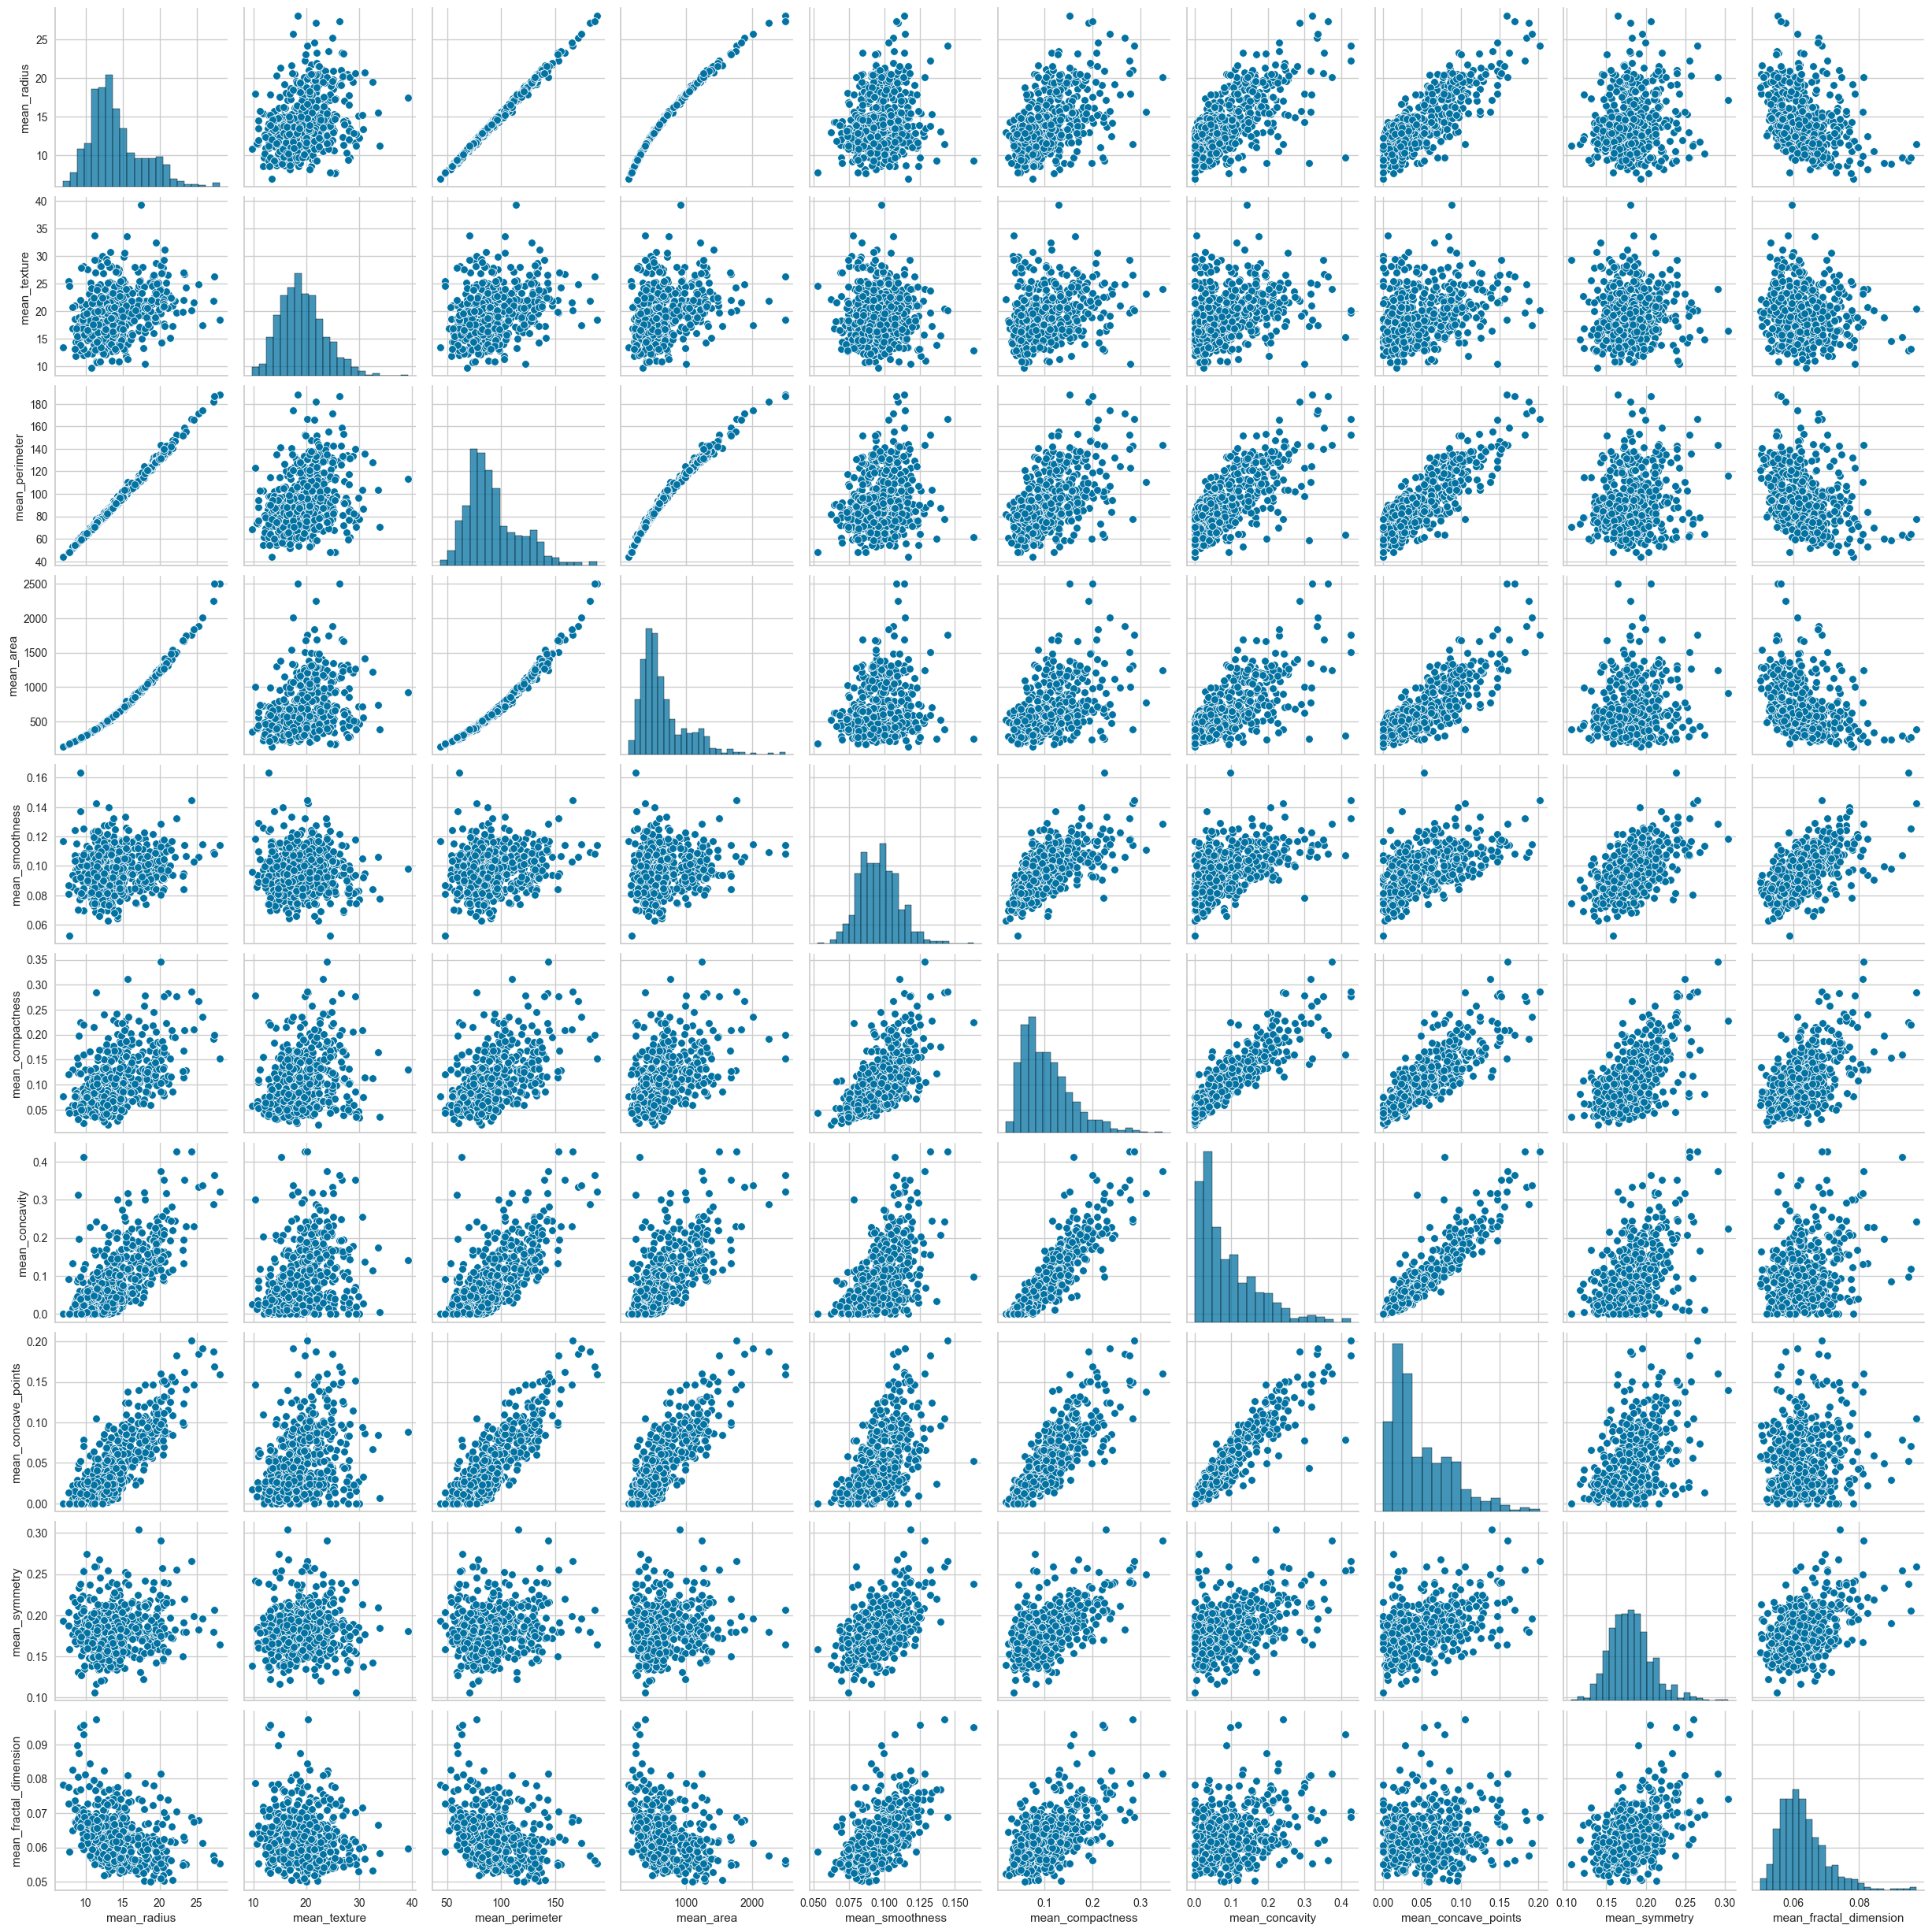

In [7]:
'''In order to use pairplot on the dataset to find pairwise relationships, we are including only the first 10 columns i.e,
we are considering the mean values and excluding the worst and error values since we are dealing with a large number of columns.'''
sns.pairplot(data.iloc[:,0:10])

In [8]:
# checking descriptive statistics for the dataset.
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


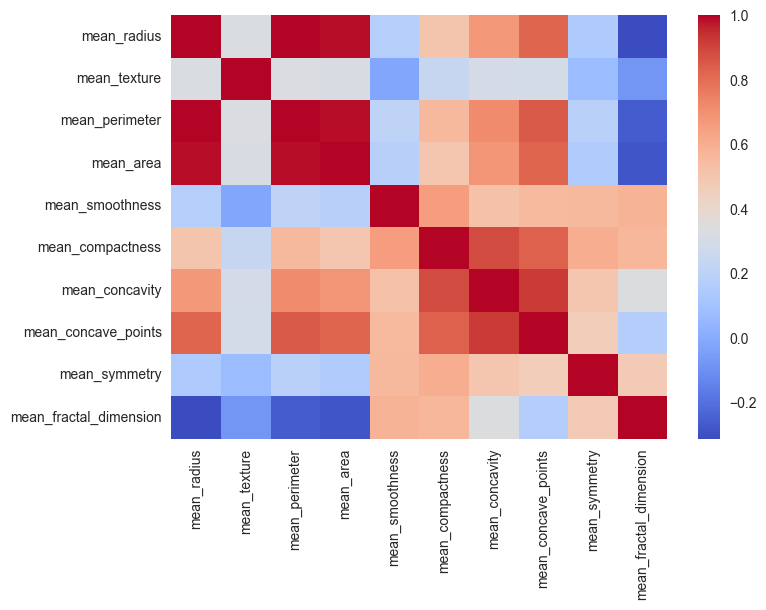

In [9]:
# checking the correlation of the first 10 variables, otherwise it would be difficult to understand the graph.
corr = data.iloc[:,0:10].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

<div class="alert"> 
* From the pairplot, it looks like the data is densely packed and there is no clear clustering with the datapoints.<br>
* From the statistics, we can see that the mean and median are almost similar. Hence, the features seems to have only few outliers and could maybe follow a normal distribution.<br>
* From the correlation heatmap, apart from the obvious (radius, perimeter and area) there is also high correlation among compactness, concavity and concave points.
</div>

# Clustering 1 -- Plain Data
---


<div class="alert alert-block alert-warning"> 
<b>Choice of Algorithm</b>: 
Given the situation in the pitch and the results from the above analyses. Which algorithm (chosen from those discussed in the lectures) would YOU choose for the clustering? Explain!
    
(Choice + 1-3 bullet points)
</div>

K-Means++ Clustering

* It doesn't look like the data has too many outliers and hence with scaling and dimensionality reduction, we could use this approach.
* Even though there is no clear separation of clusters, we could still use it as there are no separate dense regions in the graph.
* And since there may be overlapping clusters, we will use KMeans++ over Kmeans.



<div class="alert alert-block alert-warning"> 
<b>Clustering with k-Means</b>: 
For the sake of the exam, use k-Means for the clustering (even if above you argumented for a different algorithm). Conduct ALL necessary steps to create a most helpful and meaningful clustering and discuss its quality. Use appropriate diagrams to demonstrate the results. 
    
(Commented code + text/bullet points, add cells)
</div>

In [10]:
# normalising the data before we apply KMeans++.
data_sc = StandardScaler().fit_transform(data).round(2)

# checking the silhouette score for certain values, to determine K.
for n_clusters in range(2,10):
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    score = silhouette_score(data_sc, model.fit_predict(data_sc))
    print(f'For cluster {n_clusters}, the silhouette score is {score}')

For cluster 2, the silhouette score is 0.34472139869967067
For cluster 3, the silhouette score is 0.3151676469367234
For cluster 4, the silhouette score is 0.274148053972596
For cluster 5, the silhouette score is 0.164537255031013
For cluster 6, the silhouette score is 0.14654538653441732
For cluster 7, the silhouette score is 0.14650690619794418
For cluster 8, the silhouette score is 0.16247448127016467
For cluster 9, the silhouette score is 0.14394842227066795


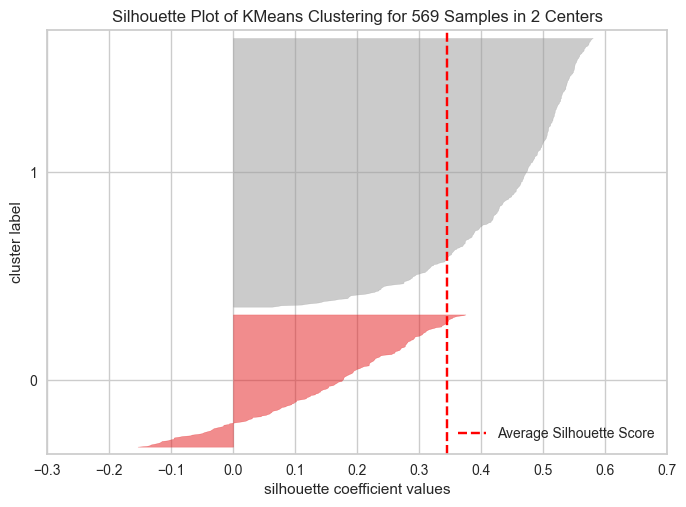

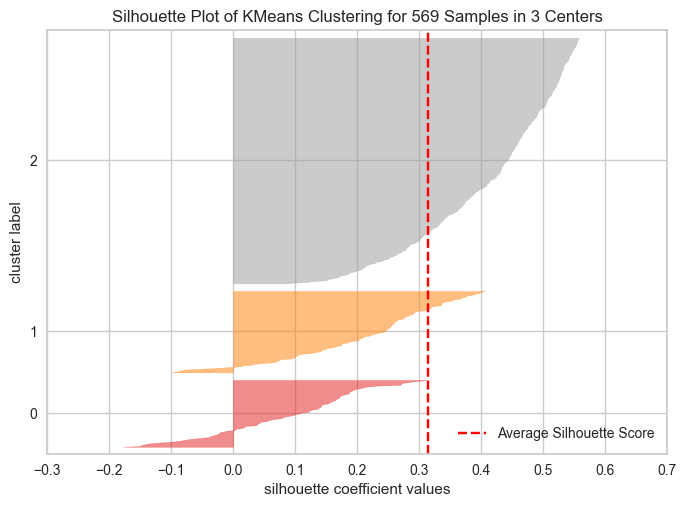

In [11]:
# From the output above, we can see maximum silhouette score for clusters 2 and 3. visualising using the silhoute plot.
for n_clusters in [2,3]:
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    vis = SilhouetteVisualizer(model)
    vis.fit(data_sc)
    vis.show()

<div class="alert alert-block">
And from the visualization of the silhouette for clusters 2 & 3, we see that cluster size 2 is less noisy compared to 3 clusters.
</div>

In [12]:
# applying KMeans
kmeans_pp = KMeans(
    n_clusters=2,
    random_state=42,
    init='k-means++')
cluster_assignments_kmpp=kmeans_pp.fit_predict(data_sc)

# printing the K-Means++ report.
print(f'k-means++ \n * has seen {kmeans_pp.n_features_in_} features,\n * used {kmeans_pp.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans_pp.inertia_}.')

k-means++ 
 * has seen 30 features,
 * used 11 iterations, and 
 * resulted in an inertia of 11596.707056015803.


In [13]:
# function to print the clustering.

colors = ["red", "darkblue", "green", "yellow"]
def print_clustering(data, clusters):
    plt.figure(figsize=(8, 8))
    for cluster in np.unique(clusters):
        if (cluster!=-1):
            data_cluster=data[clusters==cluster, :]
            plt.scatter(data_cluster[:,0], data_cluster[:,1], c=colors[cluster], s=10, label=cluster)
    plt.legend()

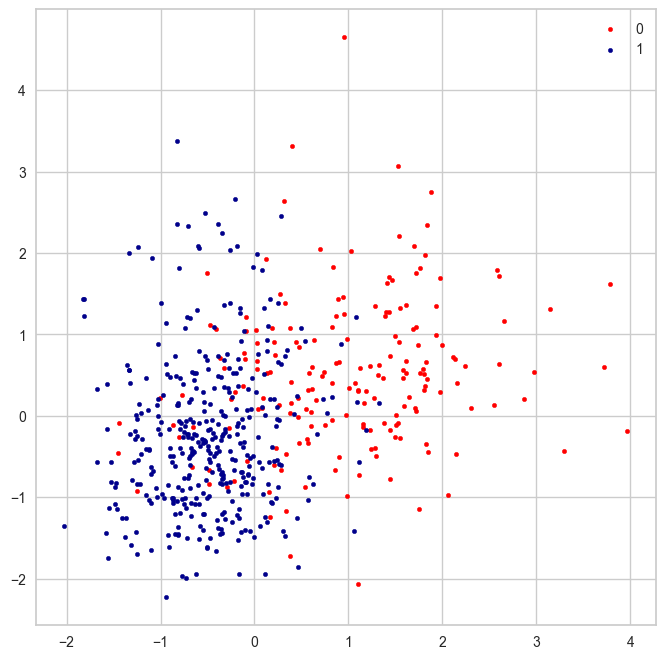

In [14]:
# printing the K-Means clustering.
print_clustering(data_sc, cluster_assignments_kmpp)

<div class="alert alert-block">
<ul>
<li>The resultant clustering image shows that there is no proper clustering as certain points that belong to one cluster can also belong to the other cluster. This is also confirmed by the silhouette coefficient of 0.35 which is way below the acceptable range.</li>
<li>The poor quality of the clustering can also be associated with the high correlation among the variables.</li>
</ul>
</div>

# Dimensionality Reduction
---
<div class="alert alert-block alert-warning"> 
<b>PCA</b>: 
Use PCA to transform the dataset. Analytically choose a reasonable number of components. Report the preserved variance.

(Commented code + text/bullet points, add cells)
</div>

In [15]:
# The output of Standard scaler is a numpy array and we would need to convert it to a dataframe to perform PCA.
data_sc =  pd.DataFrame(data_sc, index=data.index, columns=data.columns)

# applying PCA to reduce dimensions.
pca_x=PCA()
pca_transformed=pca_x.fit_transform(data_sc)

# converting the PCA ouptut to a dataframe.
data_pca=pd.DataFrame(pca_transformed, index=data_sc.index)
data_pca.round(2).cov().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,13.31,-0.0,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.0,0.0,-0.0
1,-0.00,5.7,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.0,0.0,0.0
2,-0.00,0.0,2.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.0,-0.0,0.0
3,0.00,0.0,0.00,1.98,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.0,-0.0,-0.0
4,0.00,0.0,0.00,0.00,1.65,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.0,-0.0,0.0
5,0.00,-0.0,0.00,-0.00,0.00,1.21,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.0,-0.0,-0.0
6,-0.00,-0.0,0.00,-0.00,-0.00,0.00,0.68,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.0,-0.0,0.0
7,-0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.48,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.0,0.0,0.0
8,0.00,-0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.0,0.0,-0.0
9,-0.00,-0.0,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.35,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.0,-0.0,0.0


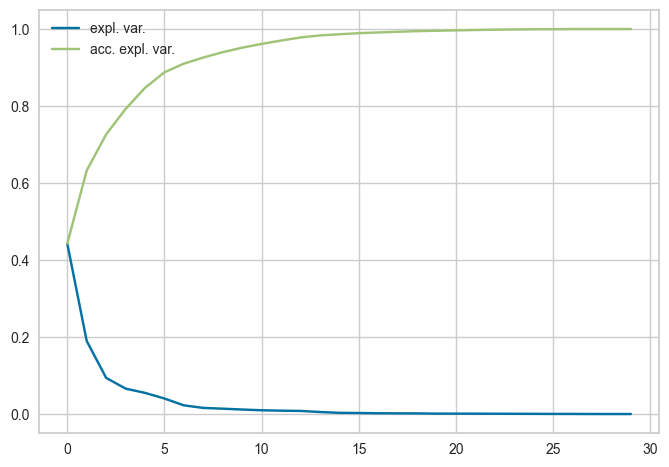

In [16]:
# creating the explained variance graph
expl_var=pca_x.explained_variance_ratio_
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.legend()

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


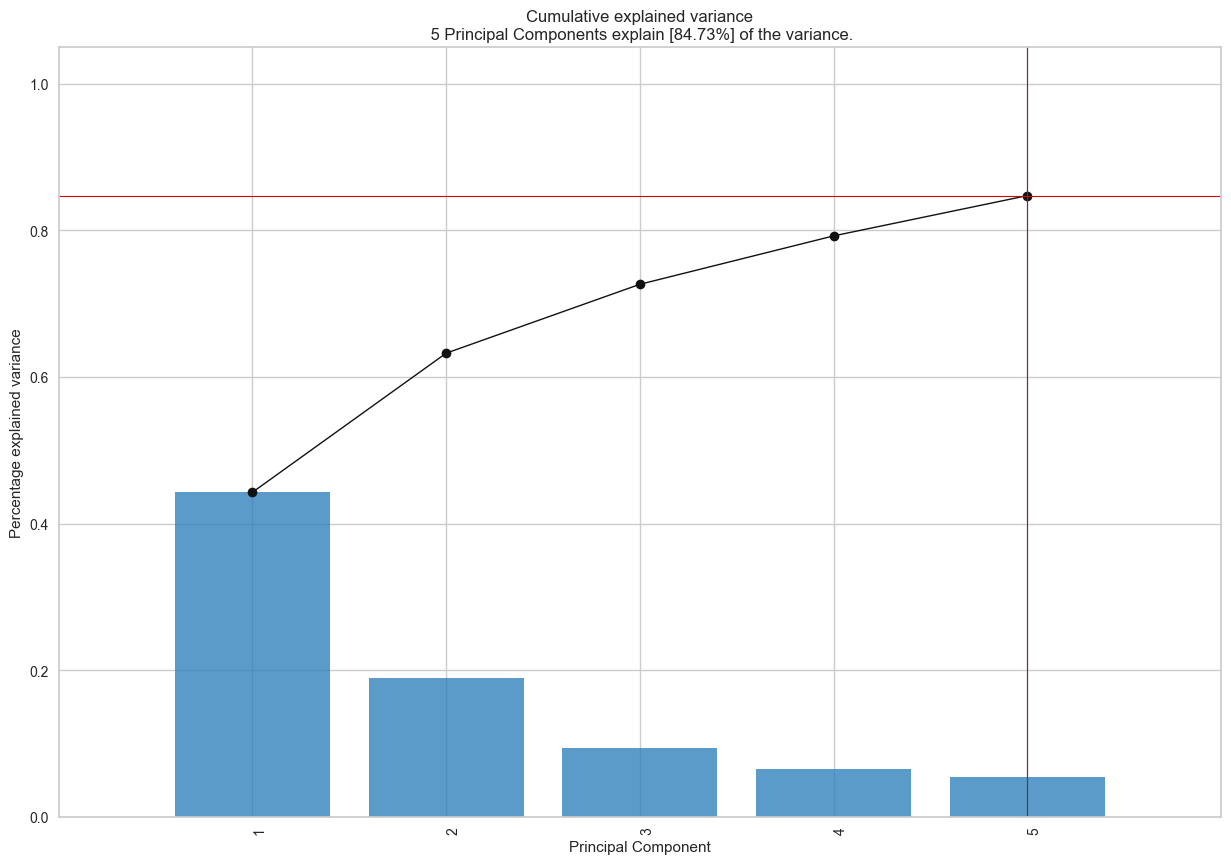

In [17]:
# from the above diagram we could see that the first five components explain about 85% of the variance.
model = pca_p(n_components=5)
# Fit transform
results = model.fit_transform(data_sc)
# explained variance
fig, ax = model.plot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC3 vs PC4 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


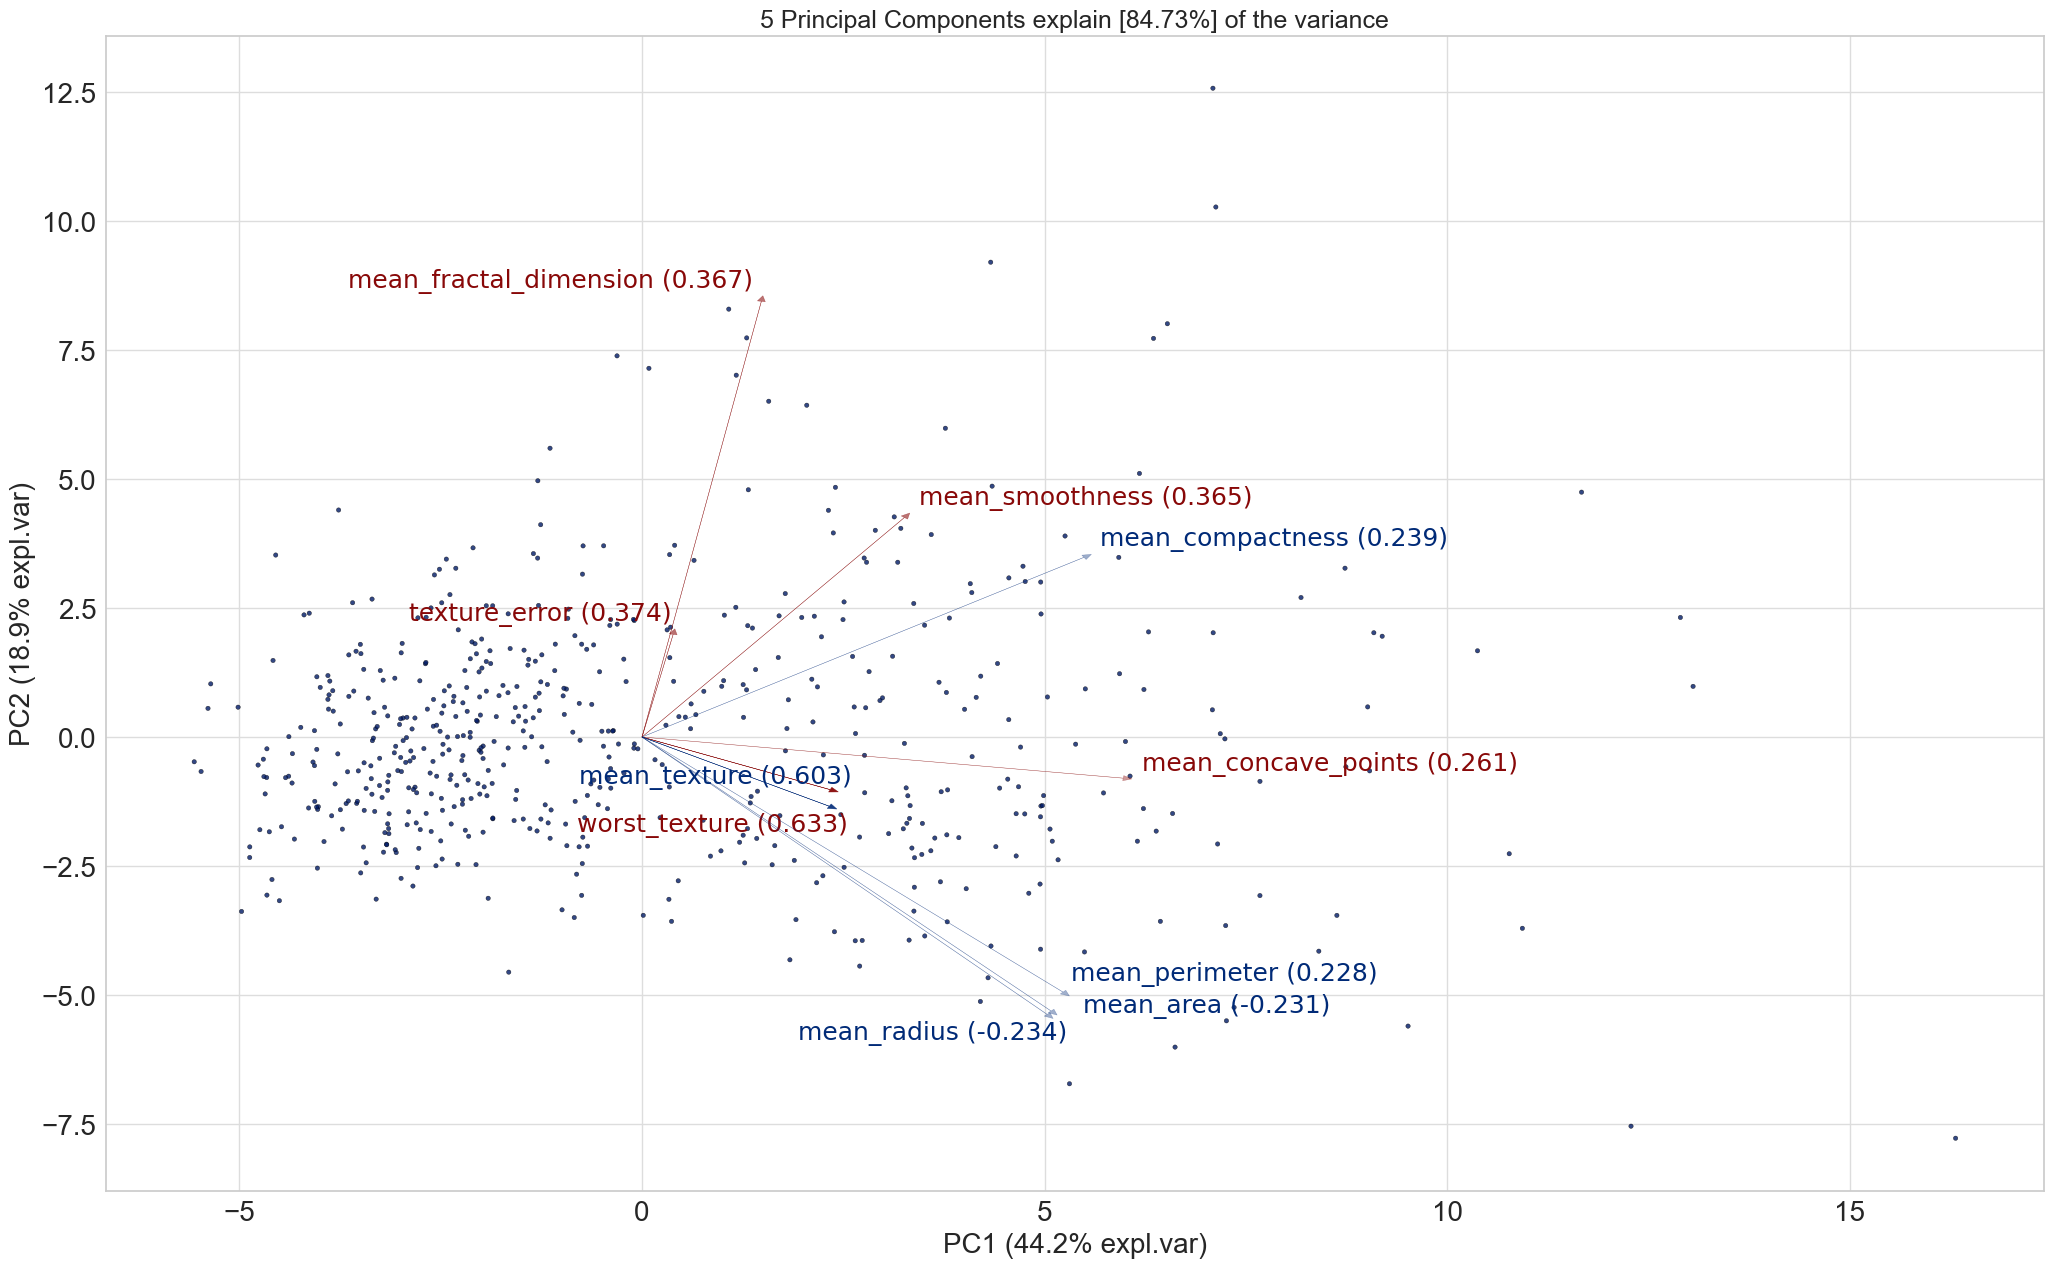

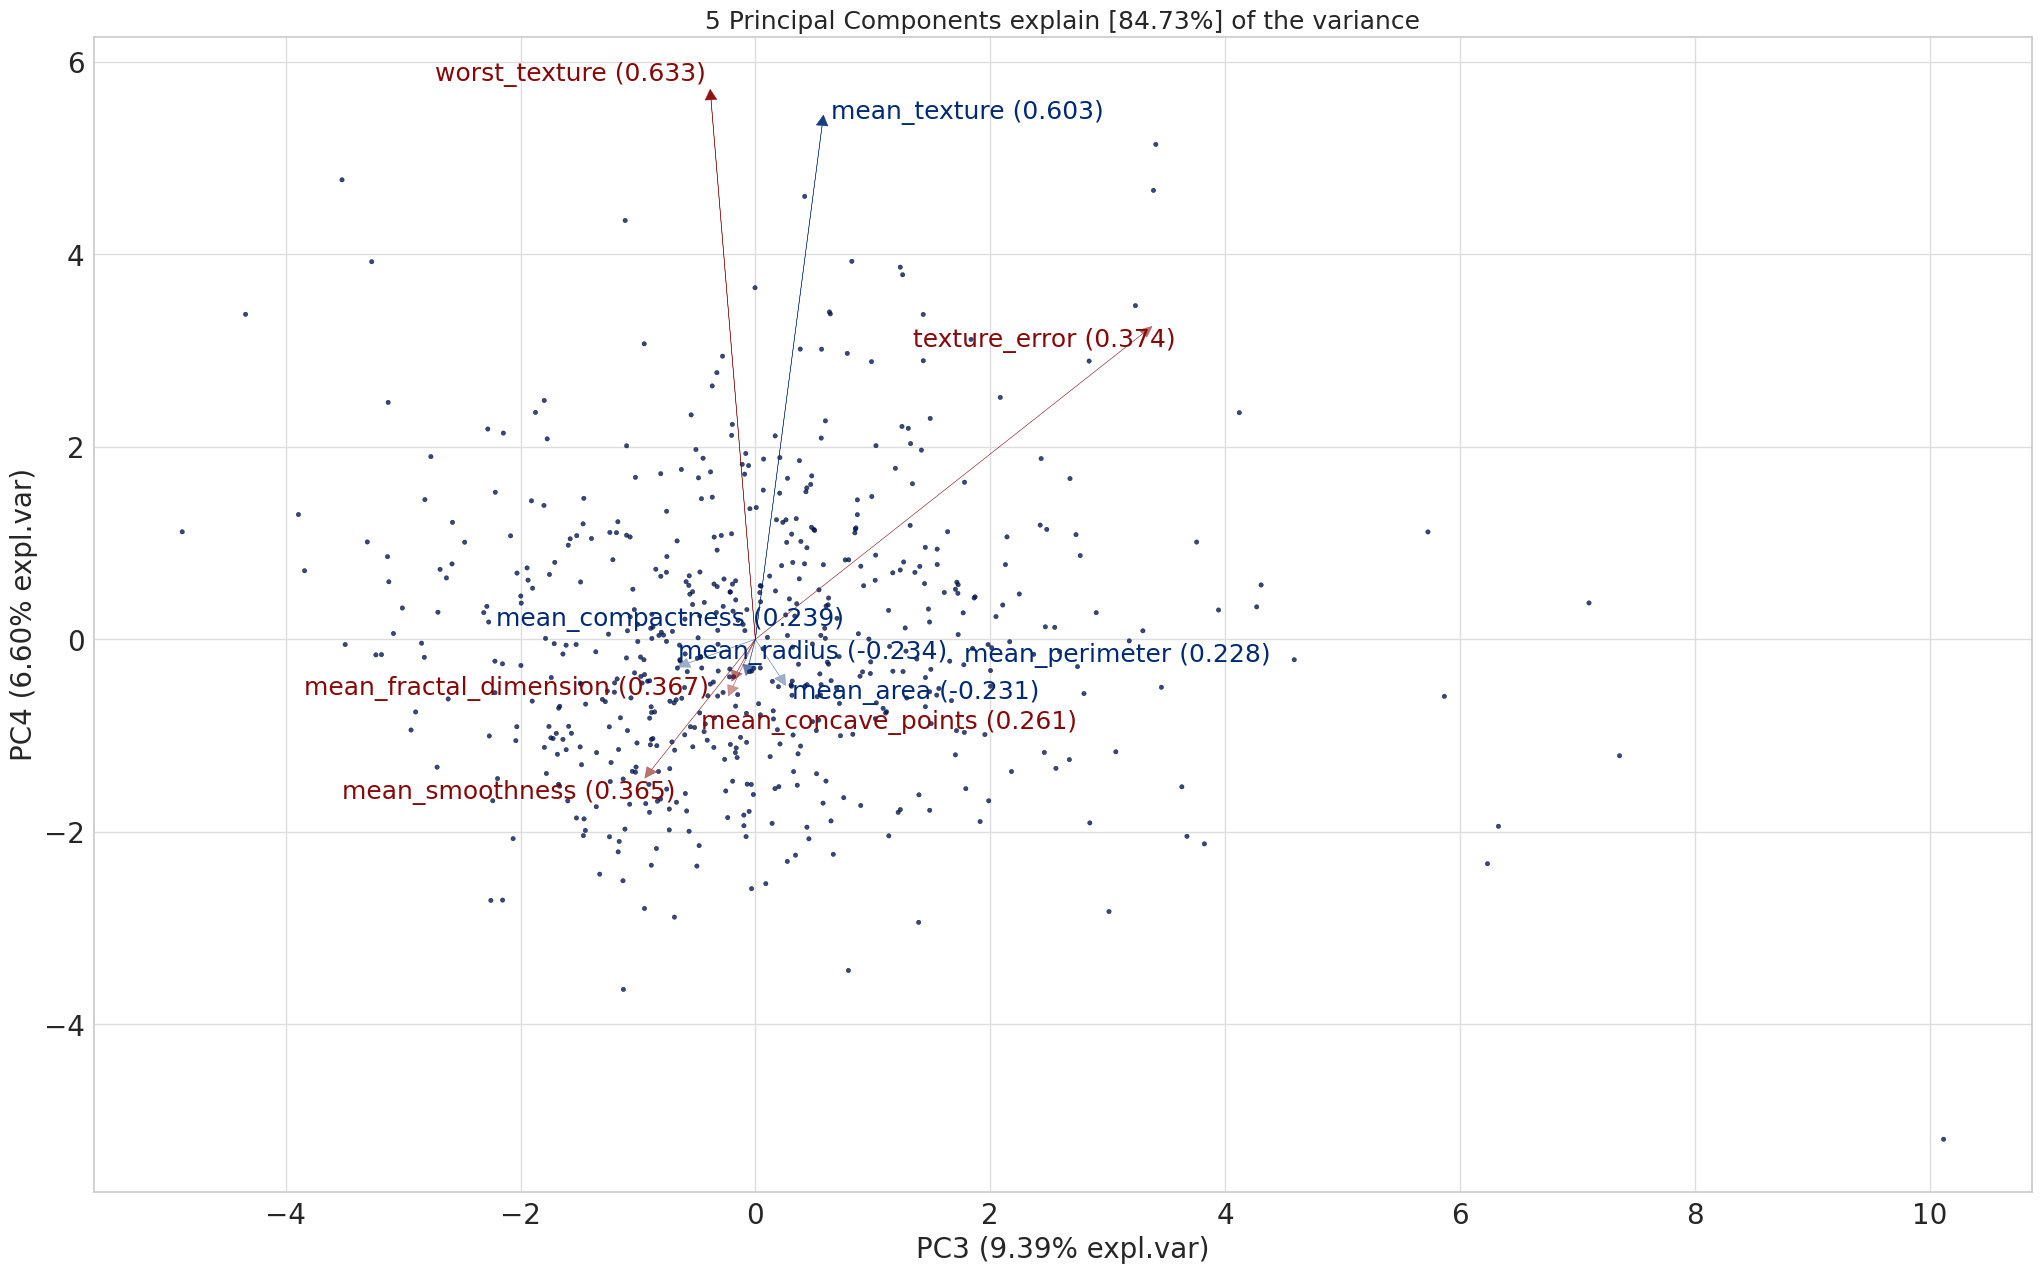

In [18]:
# Creating biplots for few of the pca components
model.biplot(n_feat=10, legend=False, PC=[0, 1], s=10)
model.biplot(n_feat=10, legend=False, PC=[2, 3], s=10)
plt.show()

<div class="alert alert-block">
 <ul>
  <li>The first 5 principal components explain around 85% of the variance.</li>
  <li>The biplot of PC1 vs PC2 shows that worst_texture is the features with the most weight in PC1. The mean_texture in the same direction which could mean that the two features have high dependence to each other.</li>
  <li>For PC2, mean_fractal_dimension has the highest weightage and the length of the vector shows its strength w.r.t the components.</li>
  <li>In PC3 vs PC4, we could see that mean_smoothness and mean_concave_points have a significant role in the pca output.</li>
</ul>
</div>

# Clustering 2 -- PCA-transformed Data
---
<div class="alert alert-block alert-warning"> 
<b>Clustering with k-Means</b>: 
On the PCA-transformed data, conduct ALL necessary steps to create a most helpful and meaningful clustering and discuss its quality. Use appropriate diagrams to demonstrate the results. 

(Commented code + text/bullet points, add cells)
</div>

In [19]:
# applying Kmeans on the pca transformed data
pca_output_data = model.results['PC'].to_numpy()

# checking the silhouette score for certain values, to determine K.
for n_clusters in range(2,10):
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    score = silhouette_score(pca_output_data, model.fit_predict(pca_output_data))
    print(f'For cluster {n_clusters}, the silhouette score is {score}')

For cluster 2, the silhouette score is 0.3932215270828406
For cluster 3, the silhouette score is 0.3613896401409029
For cluster 4, the silhouette score is 0.2099265952240392
For cluster 5, the silhouette score is 0.21075351293319544
For cluster 6, the silhouette score is 0.21671615643222317
For cluster 7, the silhouette score is 0.22151345823369278
For cluster 8, the silhouette score is 0.19005117696506776
For cluster 9, the silhouette score is 0.18045454908947162


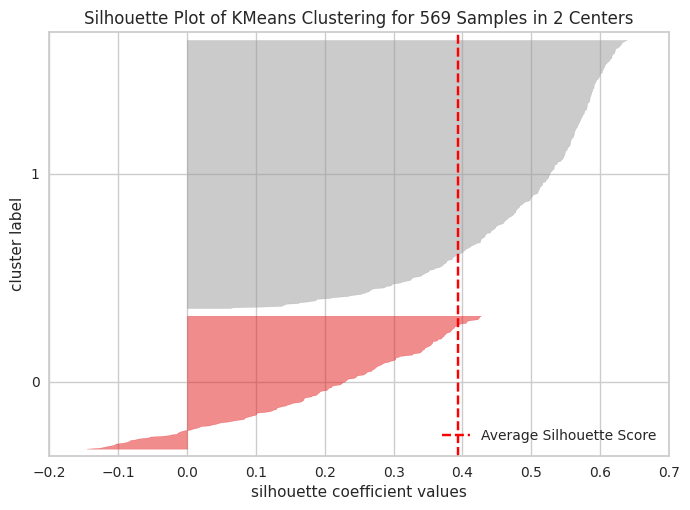

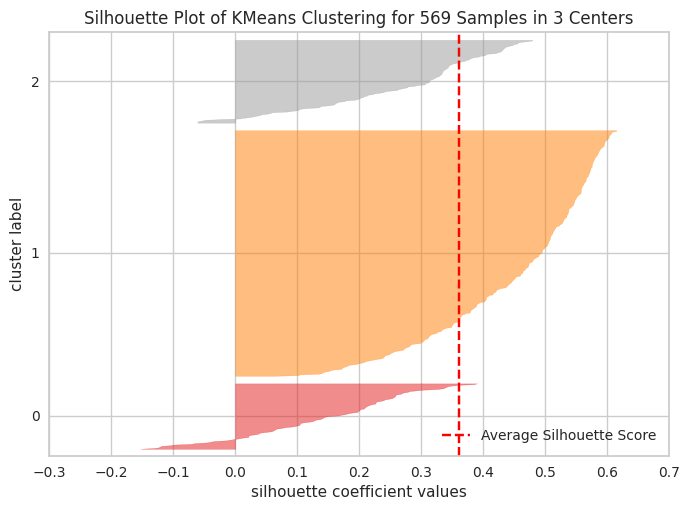

In [20]:
# From the output above, we can see maximum silhouette score for clusters 2 and 3. visualising using the silhouette plot.
for n_clusters in [2,3]:
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    vis = SilhouetteVisualizer(model)
    vis.fit(pca_output_data)
    vis.show()

k-means++ 
 * has seen 5 features,
 * used 10 iterations, and 
 * resulted in an inertia of 8992.407578885572.


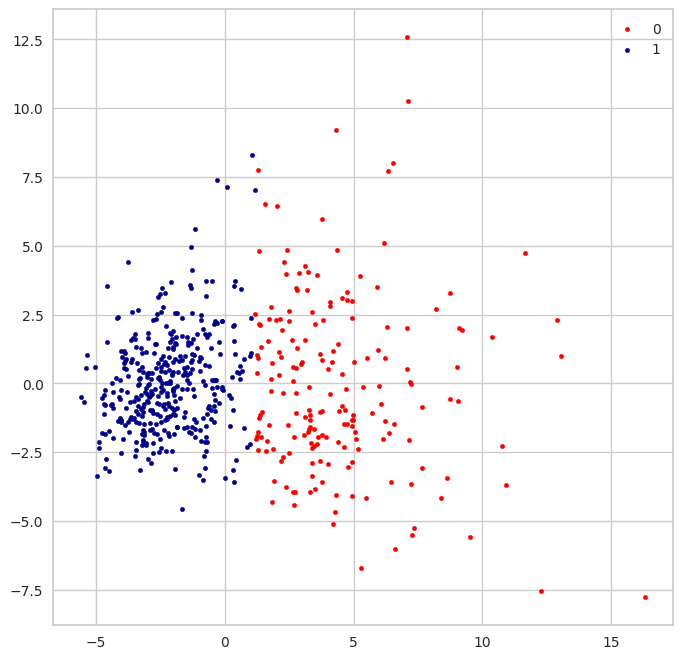

In [21]:
cluster_assignments_km_pca = kmeans_pp.fit_predict(pca_output_data)
# printing the K-Means++ report.
print(f'k-means++ \n * has seen {kmeans_pp.n_features_in_} features,\n * used {kmeans_pp.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans_pp.inertia_}.')
print_clustering(pca_output_data, cluster_assignments_km_pca)

<div class="alert alert-block">
 <ul>
  <li>After PCA, the Kmeans has now created a better quality output.</li>
  <li>PCA has reduced the overlap between the clusters and hence now there is a visible separation.</li>
  <li>The final silhouette score is still around 0.40 which isn't good.</li>
</ul>
</div>

<div class="alert alert-block alert-warning"> 
<b>Clustering Comparison</b>: 
Compare the two clusterings (on the plain data and on the PCA-transformed data) with respect to cluster memberships.
    
(Commented code + text/bullet points, add cells)
</div>

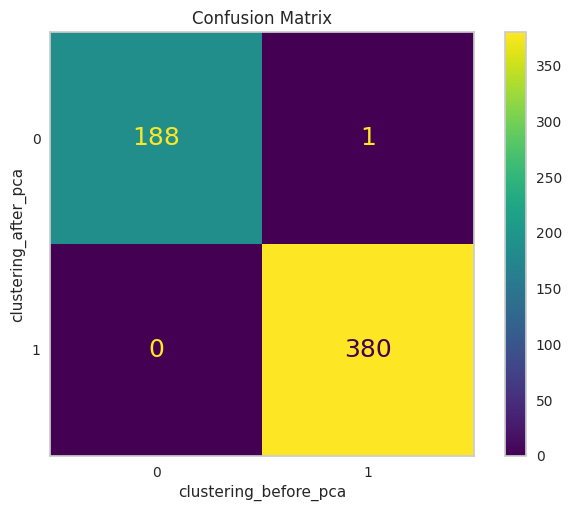

In [22]:
# storing the clustering results in the dataset.
data['outcome_km_pca'] = cluster_assignments_km_pca
data['outcome_km'] = cluster_assignments_kmpp

# creating a confusion matrix to compare cluster memberships
ConfusionMatrixDisplay.from_predictions(data['outcome_km_pca'], data['outcome_km'], display_labels = ['0', '1'])
plt.title('Confusion Matrix')
plt.ylabel('clustering_after_pca')
plt.xlabel('clustering_before_pca')
plt.grid(False)
plt.show()

<div class="alert alert-block">
 <ul>The PCA transformed data didn't have a major impact on the cluster assignments. Only 1 datapoint which earlier belonged to cluster 1 is now part of cluster 0 after applying Kmeans on the PCA transformed data. There are also few minor differences that we could see after using KMeans on the PCA transformed data:
  <li>There was an improvement of silhouette score from around 0.35 to 0.40</li>
  <li>We also saw a reduction in the inertia from 11600 to 9000</li>
</ul>
</div>

# Interpretation
---
<div class="alert alert-block alert-warning"> 
<b>Cluster Descriptions</b>: 
Create tables and visuals for the description of clusters through feature. Interpret the results for the usecase.
    
(Commented code + text/bullet points, add cells)
</div>


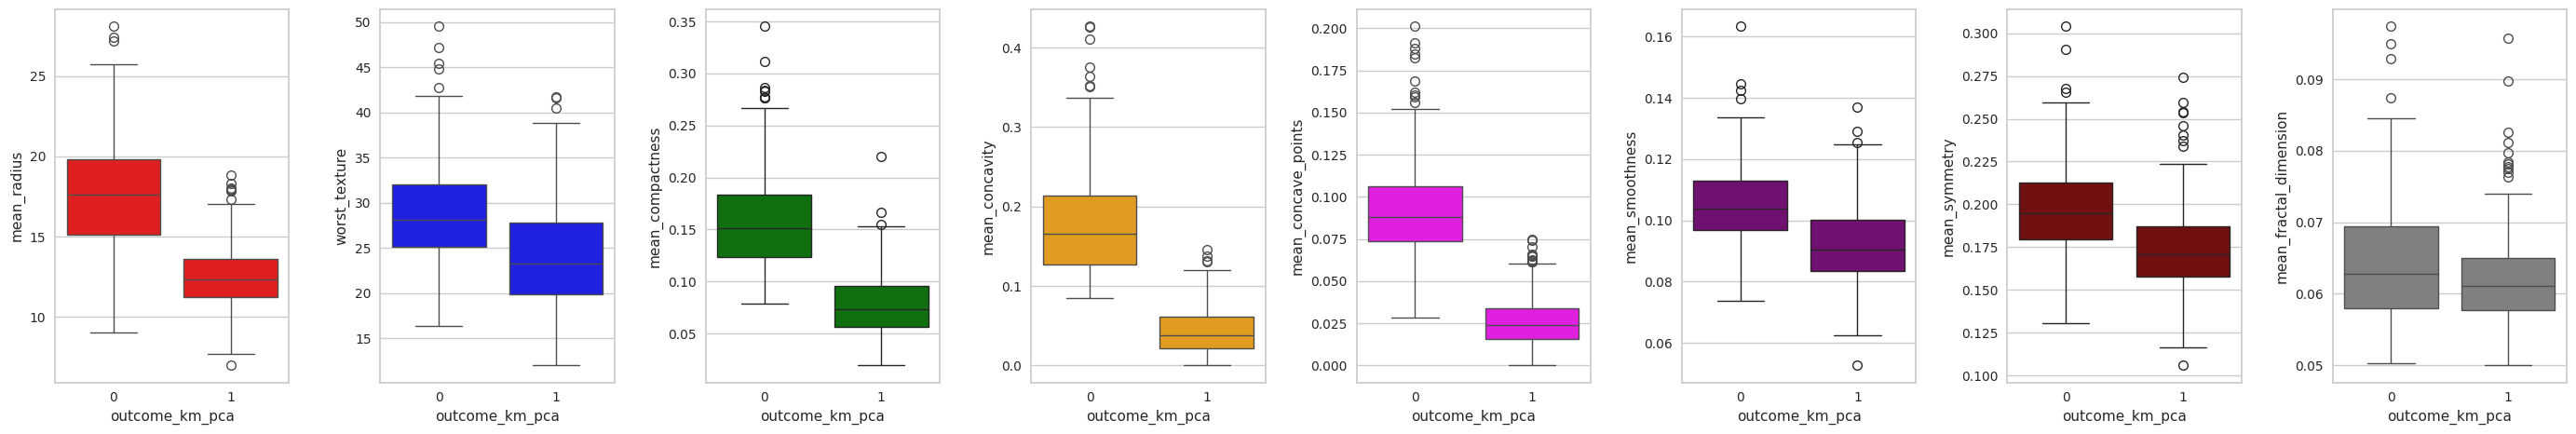

In [23]:
features_list = ['mean_radius', 'worst_texture', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_smoothness', 'mean_symmetry', 'mean_fractal_dimension']
clusters = data['outcome_km_pca'].unique()

# Create subplots for side-by-side box plots
fig, axes = plt.subplots(1, len(features_list), figsize=(28, 5))

colors=['red', 'blue', 'green', 'orange', 'magenta', 'purple', 'maroon', 'grey']
for i, feature in enumerate(features_list):
    sns.boxplot(x='outcome_km_pca', y=feature, data=data, ax=axes[i], color=colors[i])
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Cluster')
    
plt.tight_layout()

In [24]:
# Calculating the mean for features grouped by clusters.
cluster_means = data.groupby('outcome_km_pca').mean()
cluster_means

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,outcome_km
outcome_km_pca,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.556614,21.358836,116.407725,993.669841,0.104921,0.158199,0.179555,0.094069,0.197901,0.064577,0.643062,1.240411,4.603889,77.020942,0.007092,0.037914,0.051102,0.016582,0.021702,0.004892,21.291746,28.786402,143.049048,1451.233862,0.146245,0.403735,0.489863,0.189883,0.327004,0.095179,0.005291
1,12.421655,18.260500,79.814000,486.390263,0.092102,0.077554,0.043661,0.026463,0.172836,0.061913,0.286853,1.205137,2.001718,22.091684,0.007016,0.019293,0.022340,0.009416,0.019966,0.003249,13.771129,24.130816,89.461474,596.759474,0.125467,0.179923,0.163924,0.077166,0.271709,0.078359,1.000000


In [25]:
# Calculating the standard deviation for features grouped by clusters.
cluster_medians = data.groupby('outcome_km_pca').std()
cluster_medians

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,outcome_km
outcome_km_pca,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.477628,4.038248,23.416863,390.940684,0.012902,0.049057,0.070475,0.031446,0.027547,0.008646,0.346492,0.483156,2.562355,63.397826,0.002947,0.020130,0.039863,0.006224,0.010337,0.003219,4.672595,5.847089,31.590984,636.079636,0.022083,0.162642,0.184672,0.040901,0.074737,0.021823,0.072739
1,1.957404,4.054345,12.919200,155.203013,0.012615,0.028641,0.030174,0.015616,0.023252,0.005938,0.115936,0.582977,0.783904,10.140622,0.003033,0.012812,0.017374,0.004555,0.006957,0.002111,2.311456,5.695397,15.517725,204.856376,0.019890,0.085414,0.113715,0.037607,0.044129,0.012587,0.000000


<div class=alert>
<ul>
<li>From the box plots, it can be seen that there is clear distinction between the values of mean_radius, mean_compactness, mean_concavity and mean_concave_points</li>
<li>And there is not huge differences in the cluster values for mean_smoothness, mean_symmetry and mean_fractal_dimension</li>
<li>From the cluster_means table, we can see that the cluster 0 has higher mean values for most features compared to Cluster 1</li>
<li>larger standard deviations for cluster 0 features means that they are more spread out. But certain features like mean_texture, mean_smoothness and mean_symmetry have similar values for both clusters indicating minimal variations for these features among all data points.</li>
</ul>
</div>

# CONCLUSIONS
---

<div class="alert alert-block alert-warning"> 
<b>Conclusions</b>: 
Present conclusions etc. (See Task 7). Group your bulletpoints to respective headlines.
    
(Text/bullet points, this cell)
</div>


<div class=alert>
<ul><b>Summarize the achieved results.</b>
<li>The variables mean_area, mean_compactness, mean_concavity, mean_concave_points play a significant role in defining the clusterings.</li>
<li> The similarity in values for mean_smoothness, mean_symmetry and mean_fractal_dimension means that they can be removed during further analysis or processing as they don't play a mojor role.
<li>Based on all the points above, we can assume that the cluster 0 points to Malignant Tumours and the cluster 1 points to Benign tumours.</li>
</ul>
</div>

`Compare your results to the expected or desired outcomes in the original plan`

outcome_pca
B    380
M    189
Name: count, dtype: int64
Accuracy: 91.04


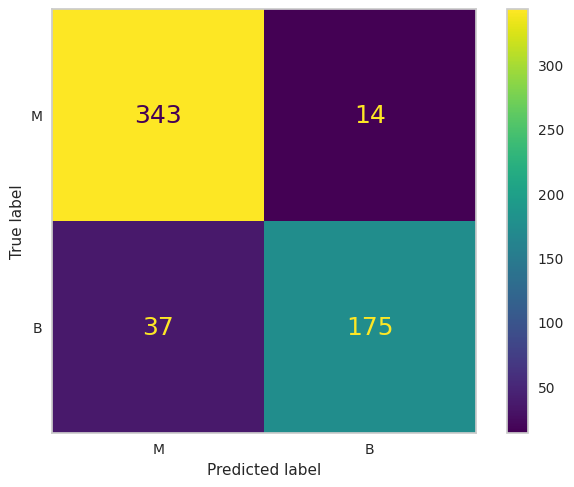

In [26]:
# comparing the clustering results to the diagnosis column
raw['outcome_pca'] = np.where(cluster_assignments_km_pca == 0, 'M', 'B')
print(raw['outcome_pca'].value_counts())
correct_predictions = (raw['diagnosis'] == raw['outcome_pca']).sum()
accuracy=round((correct_predictions / len(raw)) * 100, 2)
print("Accuracy:", accuracy)
actual_classification = raw['diagnosis']
pca_outcome = raw['outcome_pca']
ConfusionMatrixDisplay.from_predictions(actual_classification, pca_outcome, display_labels = ['M', 'B'])
plt.grid(False)
plt.show()

<div class=alert>
<li>We got the best clustering for 2 clusters which is equal to the number of unique classifications of the dataset.</li>
<li>The confusion matrix shows that our clustering was able to identify 343 Malignant and 175 Benign tumours correctly.</li>
<li>The clustering classified 14 malignant tumours as benign and 37 benign tumours as malignant.
<li>On calculating the accuracy, we get a score of 91%.</li>
</ul>
</div>

<div class=alert>
<ul><b>Explain the generated value! How do the final clusterings (from Tasks 5 and 6) help the organization specifically?</b><br>
<br>
<li>The clustering experiment showed how different features of the nuclei was related to each other.</li>
<li>Some features with large distinction among clusters help the organization in understanding the tumour characteristics.
<li>There were also few features which had low differences across clusters, which implies that these features can be ignored or given less importance during further analysis or research.</li>
<li>Based on cluster a new tumour gets assigned to, the organization can prioritise treatments for patients with Malignant Tumours who need urgent attention.</li>
<li>This could also help the organization in efficient management of its resources.</li>
</ul>
</div>


<div class=alert>
<ul><b>Recommend a course of action for the organization in your pitch based on the results.</b><br>
<br>
<li>The organization should continuously monitor and follow-up on people who get classified as having malignant tumours and hence improve their treatment efficiency and protocols.</li>
<li>Identify technological and physical gaps in their organization and manage the resources available to handle different cases.</li>
<li>Conduct further research on the underlying subgroups within the clusters and identify the treatment methods that works best in each such case</li>
<li>Conduct Research on the variability of a tumor nuclei over time and find interesting patterns which can help in better diagnosis and treatment. </li>
</ul>
</div>

<div class=alert>
<ul><b>Reflect on limitations and possible pitfalls of using these results</b><br>
<br>
<li>Our sihouette score was only around 40% even after PCA, which means that there could still be overlap of data points in the clusters.</li>
<li>Since we used Kmeans, our results are highly sensitive to noise. If there were outliers in our dataset, it could have messed up with our cluster centroids.</li>
<li>The results we got had an accuracy of only 91% which is bad when compared in a medical context and hence is probably inappropriate to apply these to other populations.</li>
<li>Since clustering is an unsupervised machine learning algorithm, we might not have captured the true features or patterns that actually decide whether a tumour is benign or malignant</li>
<li>The clustering results are highly dependent on a few features and the dataset doesn't consider other important parameters with respect to the patient such as age, gender, medical history, lifestyle habits, demographics etc.</li>
<li>The dataset contains the recordings of the nuclei image at a single point in time but ideally we should also have the data of how a nuclei changes its characteristics over time.</li>
</ul>
</div>


<div class=alert>
<ul><b>Critically discuss the employed methodology! What could or even should have been done differently</b><br>
<br>
<li>The employed methodology was Kmeans++ for both the choices. K-Means has a disadvantage that it works best with spherical shapes but our was a bit more varied data.</li>
<li>Kmeans is also sensitive to outliers and even with using Kmeans++ we might not have been able to mitigate the problem with initial selection of centroids.</li>
<li>We could have tried other clustering algorithms for our dataset but its during dimensionality reduction where we could have done things more differently</li>
<li>We could have maybe selected only one and dropped the rest among radius, parameter or radius as they are highly correlated features.</li>
<li>We also had three groups of features, we could have used only the mean values and ignored the standard error and worst values groups. This would have given us just 10 features to work with.</li>
<li>After PCA we got few dominant features like worst_texture, mean_fractal_dimension, mean_smoothness and mean_concave_points. So maybe we could have used only these features along with say mean_radius and created the final dataset to which we could have applied the pca transformation.</li>
</ul>
</div>

<div class=alert>
<ul><b>Critically reflect the original task you pitched. In hindsight, were the goals realistic? What
could have been changed at the time of the pitch?</b><br>
<br>
<li>I feel that the goals were realistc. My dataset had a classification of the diagnosis so I could use that for comparison. I can't think of something that I could have changed at the time of the pitch.</li>
</ul>
</div>


# Future Work
---

<div class="alert alert-block alert-warning"> 
<b>Future Work</b>: 
Present three ideas for future work!
    
(3 bullet points, this cell)
</div>


<ul>
<li>Trying different algorithms to the dataset after doing the dimensionality reduction ideas mentioned above would be a starter.</li>
<li>Since our data has only 569 rows, we could use HAC algorithm as it can figure out the cluster size on its own and it also doesn't assume spherical structures, so we might get a better result than what we have. But since it is sensitive to noise, we might need to remove any outliers as part of pre-processing.</li>
<li>After our clustering, we saw high standard deviation for features of cluster 0 (Malignant)tumours, so it would be interesting to see if we can get sub-clusters or patterns within those cluster by applying different algorithms like Kmeans, DBSCAN, HAC etc.</li>
</ul>
</div>